In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 

In [5]:
df = pd.read_csv("Dhaka Rent.csv", sep=';')

In [6]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [8]:
#Dependent rent, y
#Independent area, x
x = df.drop('rent', axis=1)

In [9]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [10]:
x.shape

(60, 1)

In [ ]:
# x = df[['area']]

In [ ]:
#df.drop('rent', axis=1, inplace=True) #ignore

In [12]:
y = df['rent']
y.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

# viz

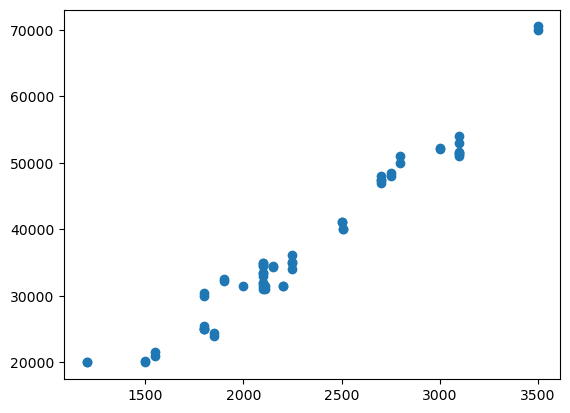

In [13]:
plt.scatter(x, y)

Text(0, 0.5, 'Rent in Taka')

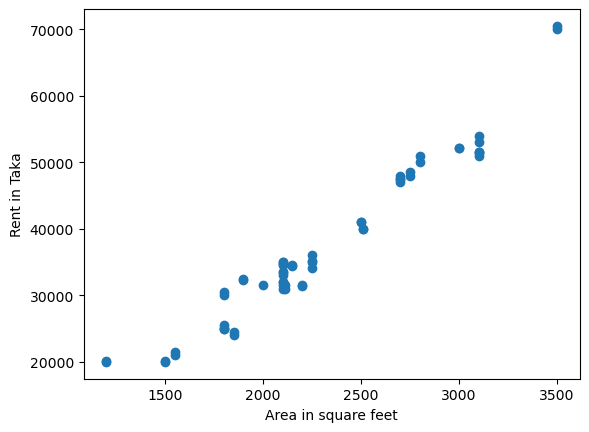

In [14]:
plt.scatter(x, y)
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Taka')

In [15]:
x.mean()

area    2289.0
dtype: float64

In [16]:
y.mean()

37269.166666666664

# Data Split

In [17]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(df, test_size=.30)

In [18]:
train.head()

,area,rent
55,3100,54000
24,2800,50000
52,3500,70500
43,2510,40000
2,2500,41050


In [19]:
train.shape

(42, 2)

In [20]:
df.shape

(60, 2)

In [21]:
test.shape

(18, 2)

# Seperate train and test for xtrain, xtest, ytrain, ytest

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.30, random_state=42)

In [35]:
xtrain.head()

,area
40,2150
4,3000
43,2510
19,2700
34,3000


In [36]:
ytrain.head()

40    34400
4     52100
43    40000
19    47000
34    52200
Name: rent, dtype: int64

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [38]:
reg.fit(xtrain, ytrain)


LinearRegression()

In [39]:
reg.coef_

array([20.68636687])

In [40]:
reg.intercept_

-10252.904740336751

In [41]:
reg.predict([[2510]])

C:\Users\rashe\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41669.87610729])

In [42]:
residual = 41669.87610729-40000
residual

1669.8761072900015

In [43]:
#Y = (M*X) + C
Y = ((reg.coef_)*2510)+(reg.intercept_)
Y

array([41669.87610729])

In [44]:
xtest.head()

,area
0,2000
5,1900
36,1500
45,3100
13,2510


In [45]:
reg.predict(xtest) # corrosponding to ytest

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

In [47]:
ytest

0     31500
5     32500
36    20200
45    51000
13    40050
54    51000
33    35100
48    25500
12    34500
57    25100
46    30000
50    31000
31    35010
3     36100
52    70500
17    21000
8     48000
6     20000
Name: rent, dtype: int64

In [49]:
pred = reg.predict(xtest)
pred

array([31119.82900279, 29051.19231563, 20776.64556701, 53874.83256151,
       41669.87610729, 47668.92250004, 36291.42072068, 26982.55562848,
       33188.46568994, 26982.55562848, 26982.55562848, 33395.32935866,
       33188.46568994, 36291.42072068, 62149.37931013, 21810.96391059,
       45600.28581288, 20776.64556701])

# MSE & MAE

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [52]:
mse = mean_squared_error(ytest,pred)
mse

7677066.2483788

In [53]:
mae = mean_absolute_error(ytest, pred)

In [54]:
mae

2103.5083233624173

In [55]:
reg.score(xtest, ytest)

0.9515542918540623

# Best Fit Line

Text(0, 0.5, 'Rent in Taka')

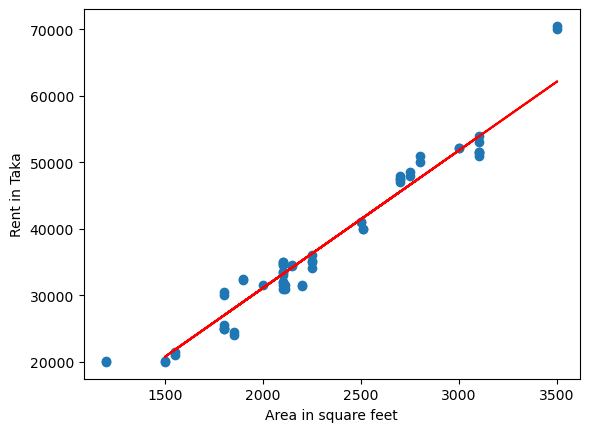

In [58]:
plt.plot(xtest, pred, color='red')
plt.scatter(x, y)
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Taka')

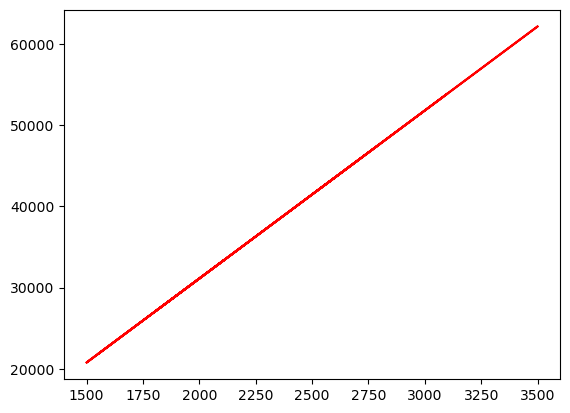

In [59]:
plt.plot(xtest.squeeze(), pred, color='red') # 